**Building a Neural Network from scratch**

To perform the **XOR** gate operation, we build a simple two-layer neural network.

*We have an input layer with two nodes: a hidden layer with five nodes and an output layer comprising one node*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# preparing the data
x = np.array([[0,1], [1,0], [1,1], [0,0]])
y = np.array([ [1], [1], [0], [0]])

In [6]:
# Define the number of nodes in each layer
num_input = 2
num_hidden = 5
num_output = 1

In [7]:
# Initializing weights and bias randomly
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1,num_hidden))

# Intializing the hidden to output layer weights
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

In [8]:
# Activation function - Sigmoid activation function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


# derivative of Sigmoid function
def sigmoid_derivative(z):
  return np.exp(-z)/((1 + np.exp(-z))**2)

In [9]:
# Define the forward propagation
def forward_prop(X, Wxh, Why):
  z1 = np.dot(X,Wxh) + bh
  a1 = sigmoid(z1)
  z2 = np.dot(a1, Why) + by
  y_hat = sigmoid(z2)

  return z1,a1,z2,y_hat

# Define the backward propagation
def backward_prop(y_hat, z1, a1, z2):
  delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
  dJ_dWhy = np.dot(a1.T, delta2)

  delta1 = np.dot(delta2, Why.T)*sigmoid_derivative(z1)
  dJ_dWxh = np.dot(x.T, delta1)

  return dJ_dWxh, dJ_dWhy

In [10]:
# Define the cost function
def cost_function(y, y_hat):
  J = 0.5*sum((y-y_hat)**2)

  return J

In [11]:
# set learning rate and number of training iterations
alpha = 0.01
num_iterations = 5000

In [12]:
# training the network
cost = []

for i in range(num_iterations):
  z1, a1, z2, y_hat = forward_prop(x, Wxh, Why)
  dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1,z2)

  # update weights
  Wxh = Wxh - alpha * dJ_dWxh
  Why = Why - alpha * dJ_dWhy

  # compute cost
  c = cost_function(y, y_hat)

  cost.append(c)

Text(0, 0.5, 'Cost')

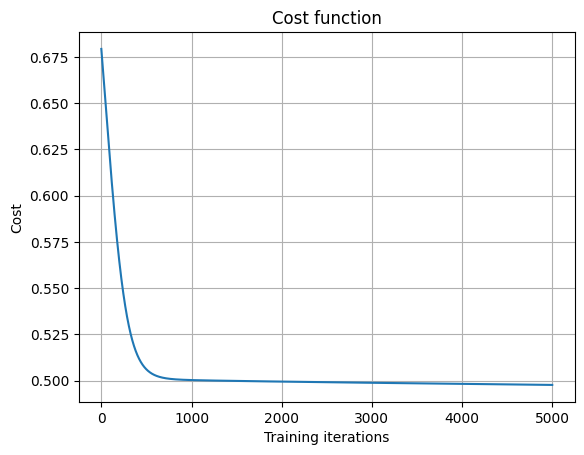

In [13]:
# plot the cost function
plt.grid()
plt.plot(range(num_iterations), cost)

plt.title('Cost function')
plt.xlabel('Training iterations')
plt.ylabel('Cost')